In [ ]:
import pandas as pd
from scipy import stats
import numpy as np
df = pd.read_csv("./dataset/LeagueofLegends.csv")

In [ ]:
df.head()

In [ ]:
#Periksa data NUll
df.isnull().sum()

In [ ]:
#Menampilkan tipe data semua kolom
df.dtypes

In [ ]:
#Describe data
df.describe()


In [ ]:
#Contoh tampilan data
df.head(1)

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [ ]:
#Boxplot Dengan Outlier
#Digunakan data df['gamelength'] untuk boxplot nya

colors = sns.color_palette('Blues', 20)
plt.figure(figsize=(2,12))
sns.boxplot(y=df['gamelength'], color=colors[14])
plt.xlabel('All Games', fontsize=18, fontweight= 'bold')
plt.ylabel('Minutes', fontsize = 18, fontweight = 'bold')
plt.show()


# Tahap membersihkan Outlier

In [ ]:
#Melakukan pembersihan data

df_of_gamelength = df['gamelength'].copy(deep=True)
print(df_of_gamelength)
df_of_gamelength = df_of_gamelength.to_numpy()          #dataframe panda diconvert ke dataframe numpy untuk mengatasi error axis
print('#' * 100)
print(df_of_gamelength)


#Membersihkan outlier
mean = np.mean(df_of_gamelength)    
std_dev = np.std(df_of_gamelength)
dis_from_mean = abs(df_of_gamelength - mean)
max_deviation = 2
not_outlier = dis_from_mean < max_deviation * std_dev
no_outliers = df_of_gamelength[not_outlier]

print(no_outliers)


In [ ]:
#Boxplot setelah outlier dibersihkan

colors = sns.color_palette('Blues', 20)
plt.figure(figsize=(2,12))
sns.boxplot(y=no_outliers, color=colors[14])
plt.xlabel('All Games', fontsize=18, fontweight= 'bold')
plt.ylabel('Minutes', fontsize = 18, fontweight = 'bold')
plt.show()

In [ ]:
# Analisis Boxplot

boxplot_IQR = stats.iqr(no_outliers)
boxplot_Q1 = np.percentile(no_outliers, 25, interpolation='midpoint')
boxplot_Q3 = np.percentile(no_outliers, 75, interpolation='midpoint')
boxtplot_IQR_2  = boxplot_Q3 - boxplot_Q1
boxplot_minimum = boxplot_Q1-(1.5*boxplot_IQR)
boxplot_maximum = boxplot_Q3+(1.5*boxplot_IQR)
boxplot_median = np.median(no_outliers)
boxplot_mean = np.mean(no_outliers)

print("IQR : " , boxplot_IQR)
print("boxplot_Q1 : " , boxplot_Q1)
print("boxplot_Q3 : " , boxplot_Q3)
print("boxtplot_IQR_2 : " , boxtplot_IQR_2)
print("boxplot_minimum : " , boxplot_minimum)
print("boxplot_maximum : " , boxplot_maximum)
print("boxplot_median : " , boxplot_median)
print("boxplot_mean : " , boxplot_mean)



Text(0, 0.5, 'Count of All Games')

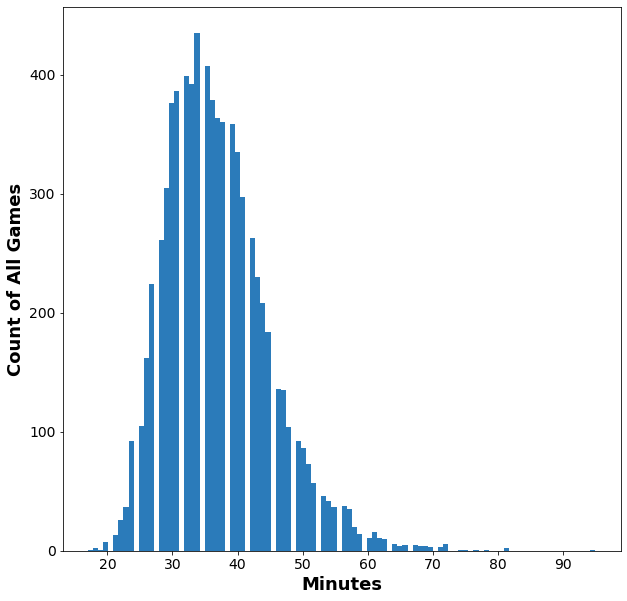

In [105]:
#gamelength versi histogram

plt.figure(figsize=(10,10))
plt.hist(x='gamelength', bins=100, data=df, color=colors[14])
plt.yticks(fontsize=14)
plt.xticks(fontsize=14)
plt.xlabel('Minutes', fontweight = 'bold', fontsize = 18)
plt.ylabel('Count of All Games', fontsize=18, fontweight='bold')

In [ ]:
# Analisis Data Kemenangan pada Sisi Team Merah dan Team Biru

blue_wins = df.bResult.sum()
red_wins = df.rResult.sum()

print(blue_wins)
print(red_wins)


In [ ]:
# Pie chart Data

sides = ['RED', 'BLUE']
data = [blue_wins, red_wins]

#create pieplot
fig = plt.figure(figsize=(10,7))

plt.pie(data, labels = sides, colors=['r','b'], autopct='%1.1f%%')
plt.title('Kemenangan Pada Sisi')

plt.show()

In [ ]:
# TODO : Ganteng doang jemput pacar depanggang